In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
import warnings

import math

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("student_df.csv")

print(df.columns.tolist())

['hh_person_id', 'tottr', 'hhmem', 'duration_min', 'trip_distance_miles', 'arr_time', 'dep_time', 'city_from_zip', 'mode_category', 'travel_date', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'empl_status', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'school_grade', 'school_city', 'school_zipcode', 'school_mode', 'education', 'person_trips', 'toll_use', 'hov_lane', 'motor_trip', 'race', 'workday_range', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'home_city', 'vehicle_op_count', 'home_primarycity', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownershi

In [3]:
df.describe()

,tottr,hhmem,duration_min,trip_distance_miles,gender,age,citizen,driver_license,transit_pass,car_sharing,...,precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type,vehicle_used
count,40339.000000,40339.000000,40339.000000,40339.000000,40339.000000,40339.000000,40339.000000,40339.000000,40339.000000,40339.000000,...,40339.000000,6833.000000,7009.000000,7025.000000,6997.000000,7019.000000,6651.000000,5860.000000,7009.000000,7047.000000
mean,2.549022,1.305436,18.125933,7.028644,1.504351,13.737946,1.061776,1.832470,1.832470,1.998537,...,1.602866,2000.936631,3.321159,1.041708,1.583965,1.071235,1.172606,3.324061,2.025967,1.382432
std,1.504862,1.316114,29.344852,39.813347,0.499987,10.638588,0.240752,0.373453,0.373453,0.038217,...,4.273926,8.294682,2.981059,0.265408,0.492935,0.360958,0.399595,1.232462,0.289483,0.486016
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1941.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,6.000000,0.885752,1.000000,8.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,1998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,2.000000,1.000000,12.000000,2.232717,2.000000,12.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,2002.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,1.000000
75%,3.000000,2.000000,20.000000,5.390152,2.000000,16.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,2006.000000,4.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,2.000000
max,41.000000,6.000000,930.000000,3065.151687,2.000000,99.000000,2.000000,2.000000,2.000000,2.000000,...,24.000000,2013.000000,13.000000,5.000000,2.000000,4.000000,3.000000,6.000000,6.000000,2.000000


In [4]:
df['mode_category'].unique()

array(['Auto', 'Active Transportation', 'Transit', 'Other'], dtype=object)

In [5]:
# check for numeric values 
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numeric columns:")
print(numeric_columns)

Numeric columns:
['tottr', 'hhmem', 'duration_min', 'trip_distance_miles', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'empl_status', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'school_grade', 'school_mode', 'education', 'person_trips', 'toll_use', 'hov_lane', 'motor_trip', 'race', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'vehicle_op_count', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinders', 'veh_type', 'vehicle_used']


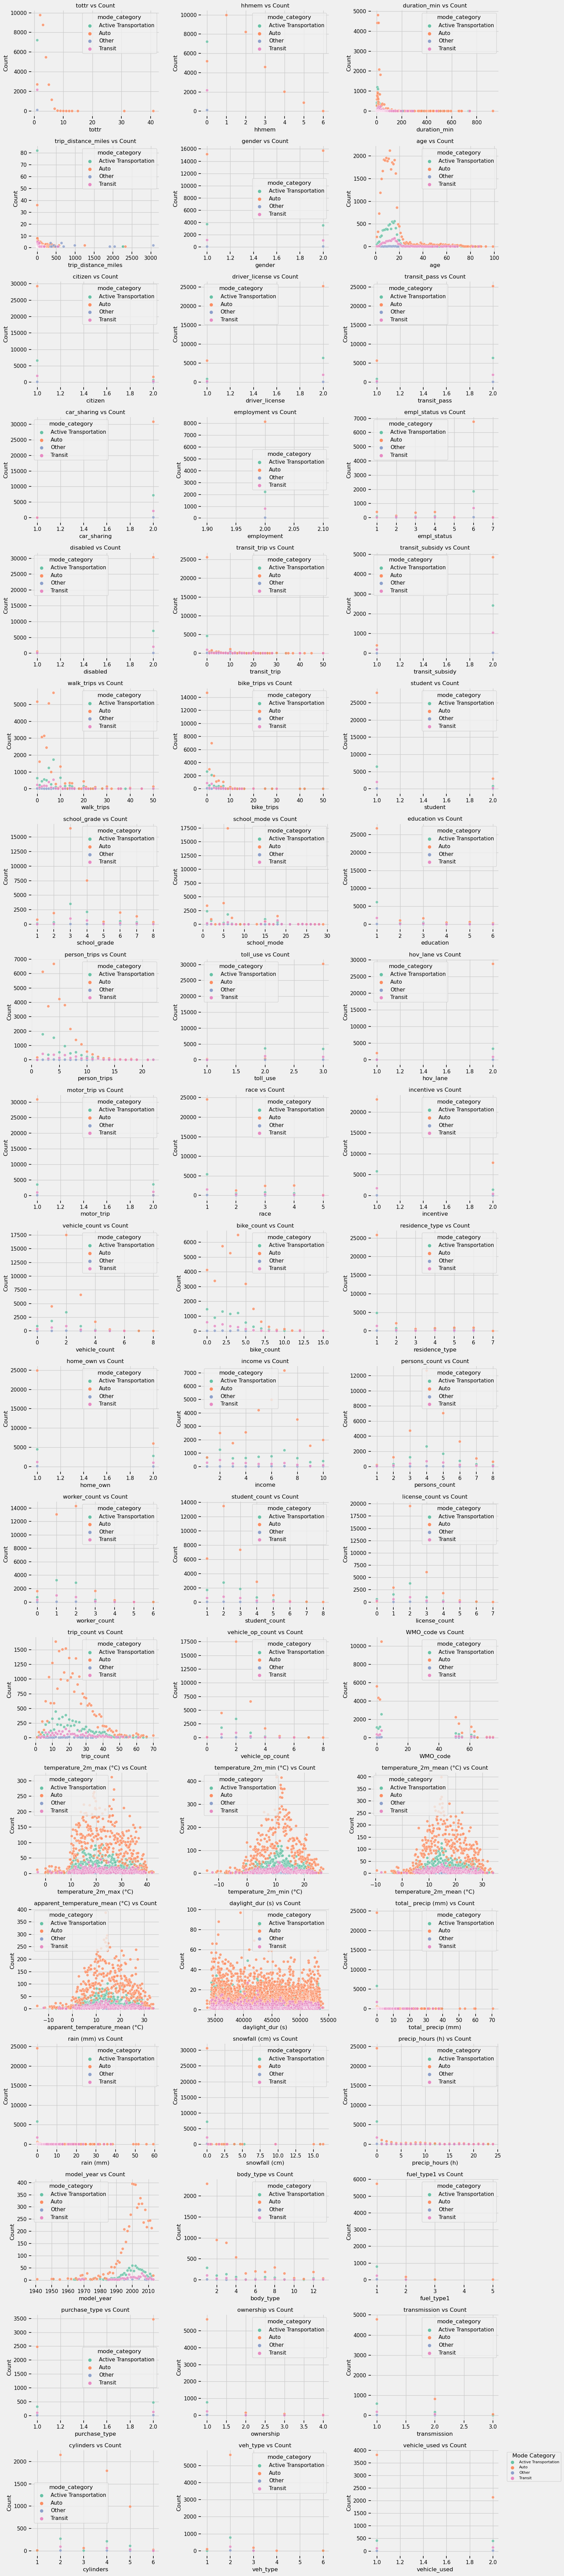

In [6]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'mode_category' matches the specified modes
modes_to_plot = ['Auto', 'Active Transportation', 'Transit', 'Other']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Group data by numeric feature and mode to calculate counts
    grouped_data = df_filtered.groupby(['mode_category', feature]).size().reset_index(name='count')
    
    # Scatter plot for the current feature
    sns.scatterplot(
        data=grouped_data,
        x=feature,
        y='count',
        hue='mode_category',
        palette='Set2',
        alpha=0.8
    )
    
    plt.title(f'{feature} vs Count')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.legend(title='Mode Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

In [7]:
# Check for null values in numeric columns
null_counts = df[numeric_columns].isnull().sum()

# Print columns with null values
print("Numeric columns with null or NaN values:")
print(null_counts[null_counts > 0])

Numeric columns with null or NaN values:
employment          29155
empl_status         29155
transit_subsidy     31223
school_mode          2028
toll_use              195
hov_lane             4961
motor_trip            195
vehicle_op_count     1266
model_year          33506
body_type           33330
fuel_type1          33314
purchase_type       33342
ownership           33320
transmission        33688
cylinders           34479
veh_type            33330
vehicle_used        33292
dtype: int64


In [8]:
# List of columns to check for null or NaN values
columns_to_clean = ['school_mode', 'toll_use', 'motor_trip']

# Drop rows with NaN in the specified columns
df_cleaned = df.dropna(subset=columns_to_clean)
df_filtered = df_cleaned[(df_cleaned['trip_distance_miles'] <= 900) & (df_cleaned['duration_min'] <= 600)]
# Replace NaN and null values in the employment column with 1 (students are default 1 istead of NAN )
df_filtered['employment'] = df_filtered['employment'].fillna(1)

# Check the result
print(f"Rows after dropping Na and null: {df_cleaned.shape[0]}")


# Check the result
print(f"Rows after dropping outliers: {df_filtered.shape[0]}")

Rows after dropping Na and null: 38122
Rows after dropping outliers: 38097


In [9]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['hh_person_id', 'arr_time', 'dep_time', 'city_from_zip', 'mode_category', 'travel_date', 'school_city', 'school_zipcode', 'workday_range', 'home_city', 'home_primarycity']


In [10]:
# Create a DataFrame with only non-numeric columns
df_non_numeric = df[non_numeric_columns]

# Display the DataFrame with non-numeric columns
df_non_numeric.head()

,hh_person_id,arr_time,dep_time,city_from_zip,mode_category,travel_date,school_city,school_zipcode,workday_range,home_city,home_primarycity
0,1032036_3,11:30:00,11:10:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
1,1032036_3,11:45:00,11:31:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
2,1032036_3,12:00:00,11:52:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
3,1032036_3,15:50:00,15:30:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
4,1032036_4,08:35:00,08:15:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO


In [11]:
# Check the data type of each column
column_types = df_non_numeric.dtypes

# Display the types
print("Data types of each column:")
print(column_types)

Data types of each column:
hh_person_id        object
arr_time            object
dep_time            object
city_from_zip       object
mode_category       object
travel_date         object
school_city         object
school_zipcode      object
workday_range       object
home_city           object
home_primarycity    object
dtype: object


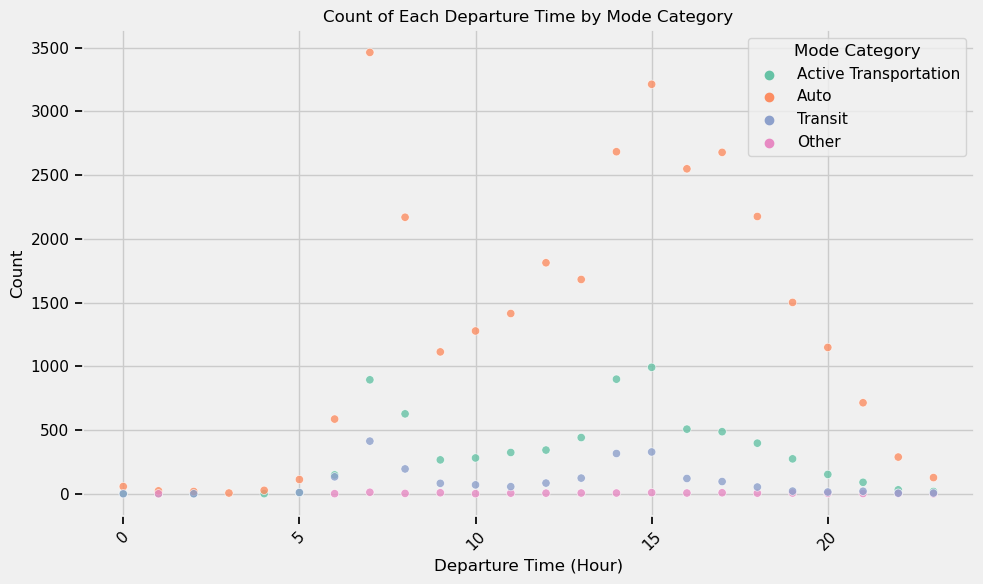

In [12]:
# Convert 'dep_time' to datetime format
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')

# Filter out rows where 'dep_time' could not be converted (NaT values)
df_filtered = df.dropna(subset=['dep_time'])

# Group by 'dep_time' and 'mode_category' to get the counts
grouped_data = df_filtered.groupby([df['dep_time'].dt.hour, 'mode_category']).size().reset_index(name='count')

# Plotting the count of each departure time, color-coded by mode category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='dep_time', y='count', hue='mode_category', palette='Set2', alpha=0.8)

# Customize the plot
plt.title('Count of Each Departure Time by Mode Category')
plt.xlabel('Departure Time (Hour)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode Category')
plt.tight_layout()

plt.show()

# Temporal Features EDA

# Socio-demographics Features EDA 

# Geospatial Features EDA

In [13]:
df_non_numeric.head()

,hh_person_id,arr_time,dep_time,city_from_zip,mode_category,travel_date,school_city,school_zipcode,workday_range,home_city,home_primarycity
0,1032036_3,11:30:00,11:10:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
1,1032036_3,11:45:00,11:31:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
2,1032036_3,12:00:00,11:52:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
3,1032036_3,15:50:00,15:30:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
4,1032036_4,08:35:00,08:15:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO


In [14]:
# overlap with city_from_zip column
df_non_numeric = df_non_numeric.drop(columns=['home_city'])

In [15]:
df_non_numeric['city_from_zip'].unique()

array(['Greater Los Angeles Area', 'Sacramento Area',
       'San Francisco Bay Area', 'Stockton Area', 'San Diego County',
       'Riverside-San Bernardino', 'Fresno Area', 'Bakersfield Area'],
      dtype=object)

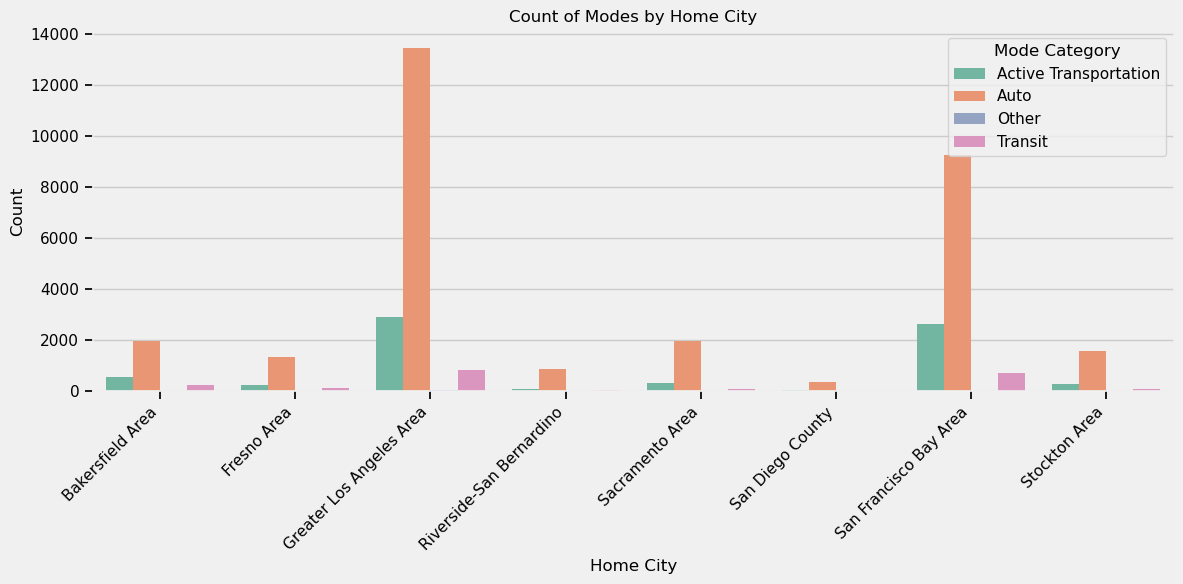

In [16]:

# Group by 'home_city' and 'mode_category' to get counts
home_city_mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=home_city_mode_counts, x='city_from_zip', y='count', hue='mode_category', palette='Set2')

# Customize the plot
plt.title('Count of Modes by Home City')
plt.xlabel('Home City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mode Category')
plt.tight_layout()

plt.show()

In [17]:
import folium
from folium import Circle
from folium.plugins import HeatMap

In [18]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Create the map centered around California
map_center = (36.7783, -119.4179)
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each area, color-coded by mode category
for area, coords in area_centers.items():
    area_modes = mode_counts[mode_counts['city_from_zip'] == area]
    
    # For simplicity, we are color-coding by mode_category, you can modify this based on the logic you want
    for _, row in area_modes.iterrows():
        mode = row['mode_category']
        count = row['count']
        
        # Set color based on the mode (you can customize the colors)
        mode_colors = {
            'Auto': 'yellow',
            'Transit': 'green',
            'Active Transportation': 'orange',
            'Other': 'red'
        }
        
        # Add a circle marker with color based on the mode
        folium.CircleMarker(
            location=coords,
            radius=count / 150,  # Adjust size based on count (you can modify this factor)
            color=mode_colors.get(mode, 'gray'),
            fill=True,
            fill_color=mode_colors.get(mode, 'gray'),
            fill_opacity=0.5,
            popup=f'{area}: {mode} ({count})'
        ).add_to(m)

# Display the map
m

In [19]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Mode color dictionary for heatmap
mode_colors = {
    'Auto': 'blue',
    'Transit': 'green',
    'Active Transportation': 'orange',
    'Other': 'red'
}

# Function to generate a heatmap for a specific mode
def create_heatmap_for_mode(mode):
    # Filter the mode data
    mode_data = mode_counts[mode_counts['mode_category'] == mode]
    
    # Create a map centered around California
    map_center = (36.7783, -119.4179)
    m = folium.Map(location=map_center, zoom_start=6)
    
    # Prepare data for the heatmap (latitude, longitude, intensity)
    heat_data = []
    for _, row in mode_data.iterrows():
        city = row['city_from_zip']
        count = row['count']
        coords = area_centers[city]
        
        # Add the data point (latitude, longitude, intensity)
        heat_data.append([coords[0], coords[1], count])
    
    # Add heatmap layer for this mode
    HeatMap(heat_data, min_opacity=0.3, max_val=max(mode_counts['count']), radius=25, blur=5, gradient={0: 'gray', 0.5: mode_colors[mode], 1: mode_colors[mode]}).add_to(m)
    # just print it for now 
    # Save the map to an HTML file just print it for now 
    #m.save(f"heatmap_{mode}.html")
    return m

# Generate separate maps for each mode
for mode in mode_colors.keys():
    print(mode)
    create_heatmap_for_mode(mode)



Auto
Transit
Active Transportation
Other


In [20]:
create_heatmap_for_mode('Active Transportation')

In [21]:
df_filtered.to_csv('student_df_v2.csv')